In [1]:
import numpy as np
from numpy import genfromtxt

from sklearn import datasets
import sklearn
import sklearn.decomposition

from matplotlib import pyplot as plt

### Свой PCA

In [7]:
def CovarianceMatrix(x):
    dim = x.shape[0]
    return (1/dim) * np.dot(np.transpose(x), x)

In [10]:
class MyPCA:
    def __init__(self, numComponents = 2):
        self.numComponents = numComponents
        self.mean = None
        self.components = None
        self.explained_variance = None
        self.explained_variance_ratio = None

    def fit(self, x):
        self.mean = x.mean(axis=0)
        x = x - self.mean
        MatrCov = CovarianceMatrix(x)

        eigenvalues, eigenvectors = np.linalg.eigh(matrCov)
        eigenvalues = np.flip(eigenvalues, axis = 0)
        eigenvectors = np.flip(eigenvectors, axis = 1)

        self.components = np.transpose(eigenvectors[:, :self.numComponents])
        self.explained_variance = eigenvalues[:self.numComponents]
        self.explained_variance_ratio = self.explained_variance / sum(eigenvalues)
        return self

    def transform(self, x):
        x0 = x - self.mean
        return np.dot(x0, np.transpose(self.components))

In [11]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [14]:
myPCA = MyPCA(numComponents = 2).fit(X)
print(myPCA.transform(X))
print(myPCA.explained_variance)
print(myPCA.explained_variance_ratio)

[[ -1.25946645 -21.27488348]
 [  7.9576113   20.76869896]
 [  6.99192297   9.95598641]
 ...
 [ 10.8012837    6.96025223]
 [ -4.87210009 -12.42395362]
 [ -0.34438963  -6.36554919]]
[178.90731578 163.62664073]
[0.14890594 0.13618771]


#### PCA from sklearn

In [20]:
from sklearn.decomposition import PCA
skPCA = PCA(n_components = 2, random_state = 42).fit(X)

In [21]:
skPCA.transform(X)

array([[ -1.25946693,  21.27488356],
       [  7.95760957, -20.76869907],
       [  6.99192423,  -9.95598643],
       ...,
       [ 10.80128436,  -6.96025201],
       [ -4.87210185,  12.42395304],
       [ -0.34438754,   6.36554946]])

In [22]:
skPCA.explained_variance_

array([179.0069301 , 163.71774688])

In [23]:
skPCA.explained_variance_ratio_

array([0.14890594, 0.13618771])

### Кластеризация K-Means

In [25]:
%%time
from sklearn.manifold import TSNE
xTSNE = TSNE(n_components = 2, n_iter = 5000, n_iter_without_progress = 500).fit_transform(X, y)

Wall time: 6min 32s


Text(0.5,1,'TSNE visualisation')

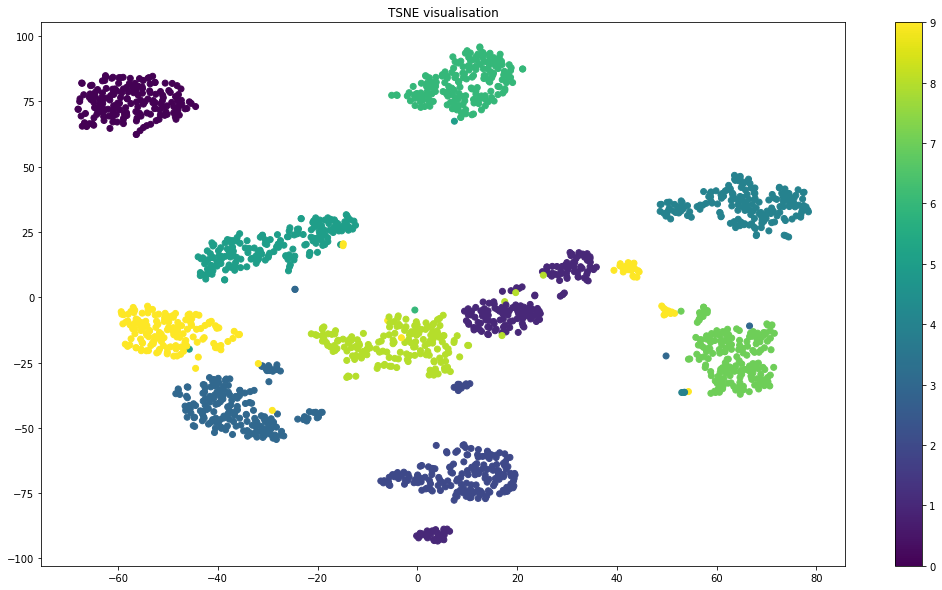

In [26]:
plt.figure(figsize = (18, 10))
plt.scatter(xTSNE.transpose()[0], xTSNE.transpose()[1], c = y)
plt.colorbar()
plt.title('TSNE visualisation')

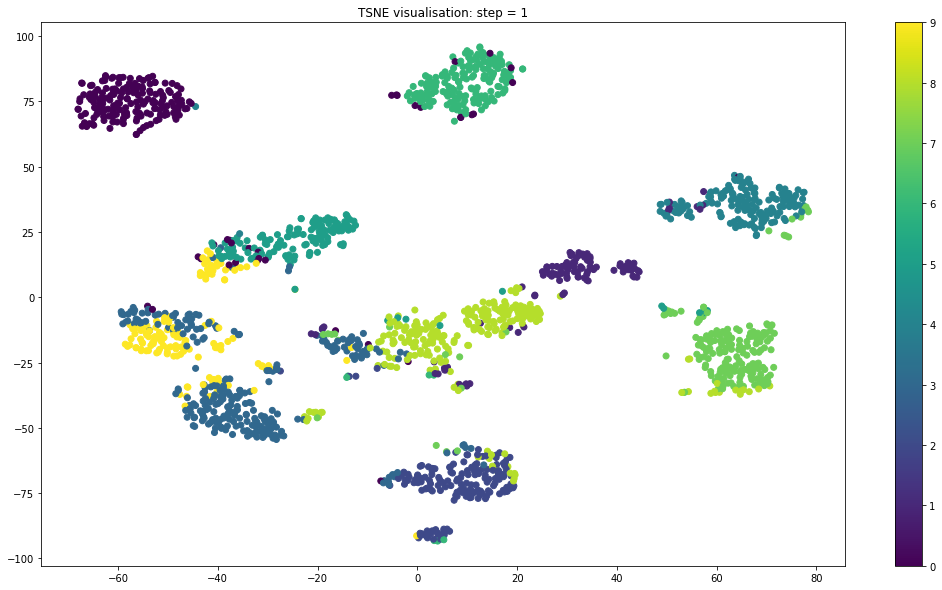

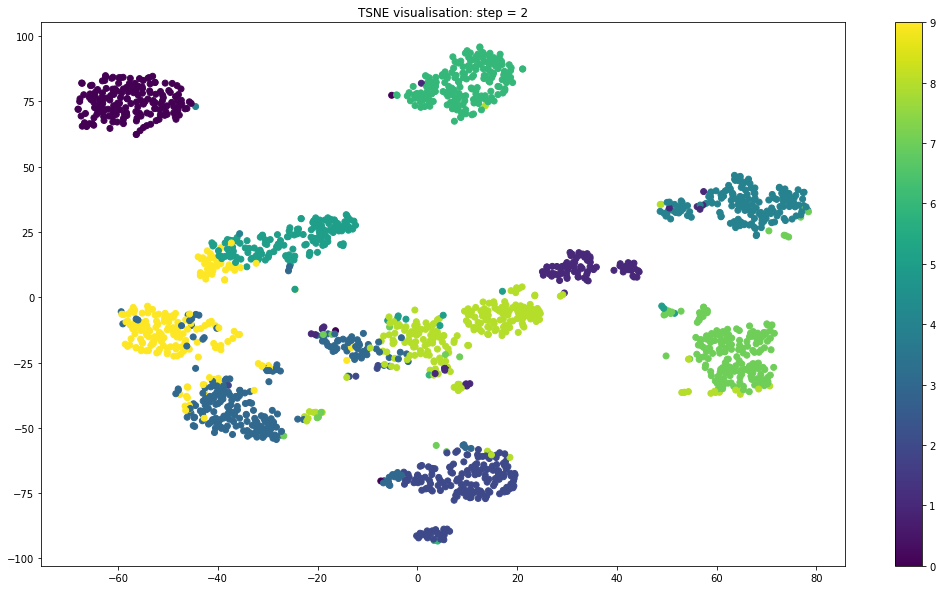

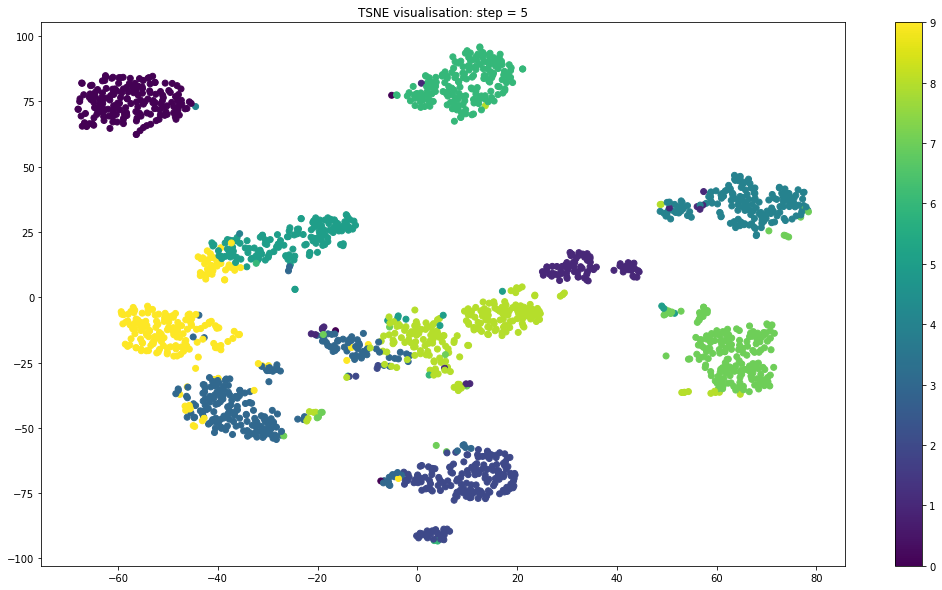

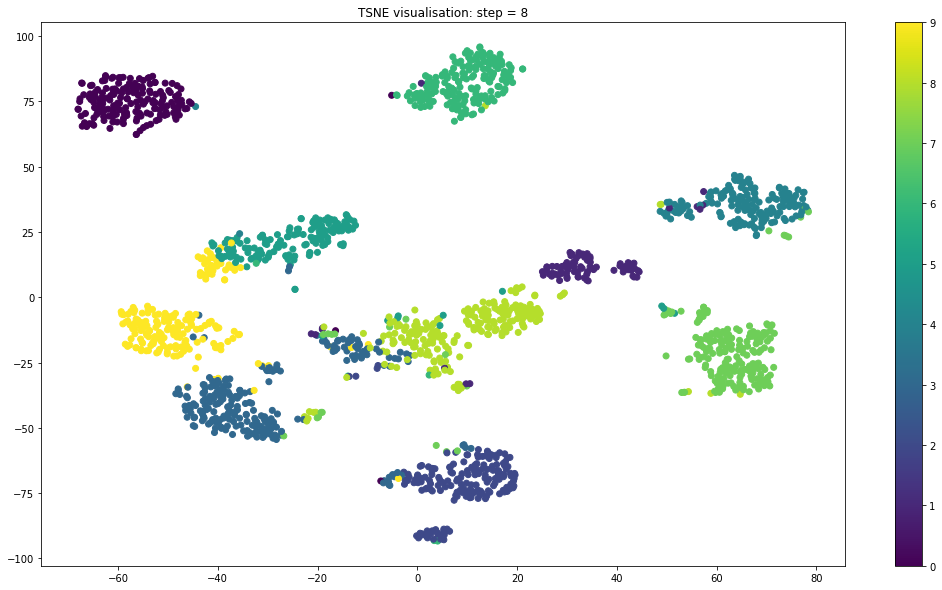

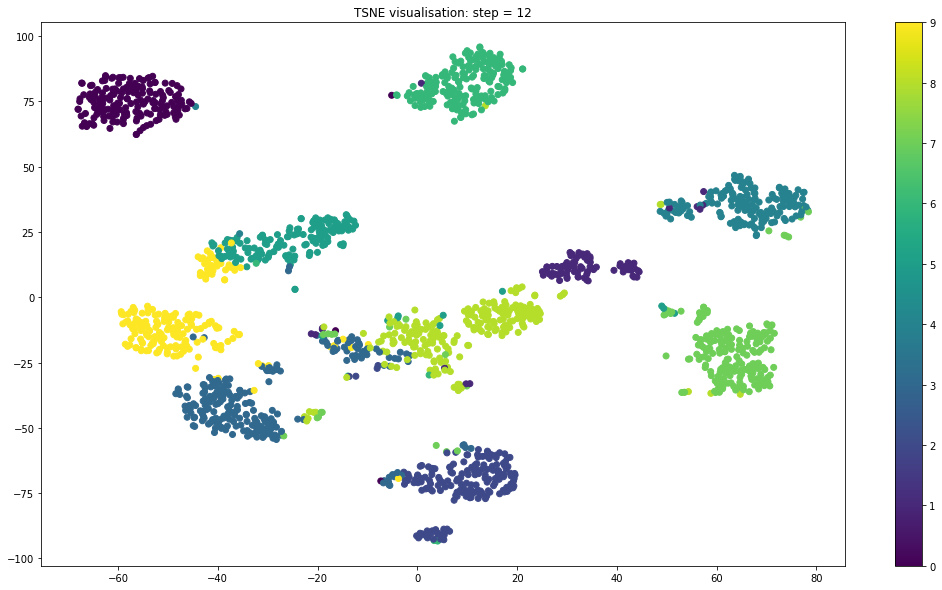

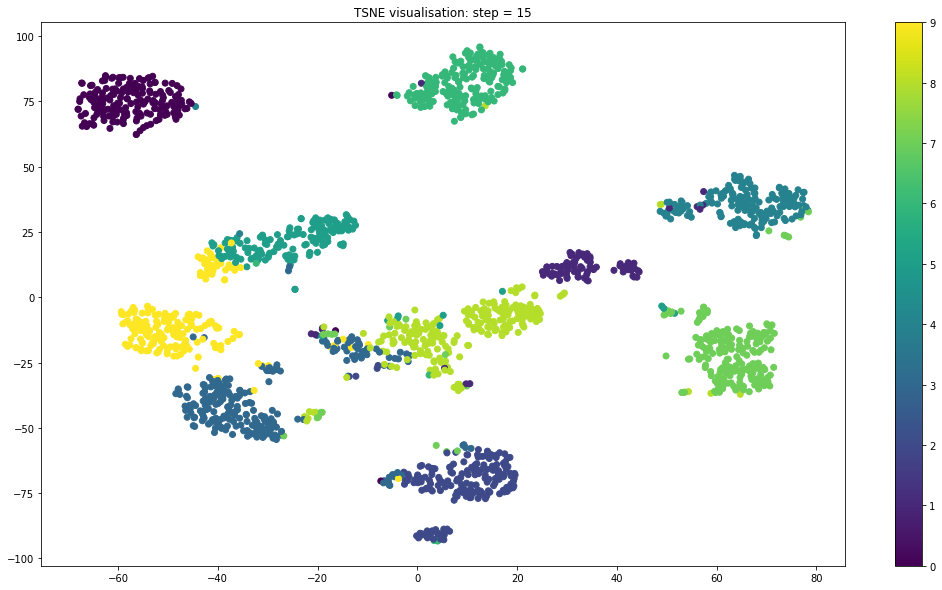

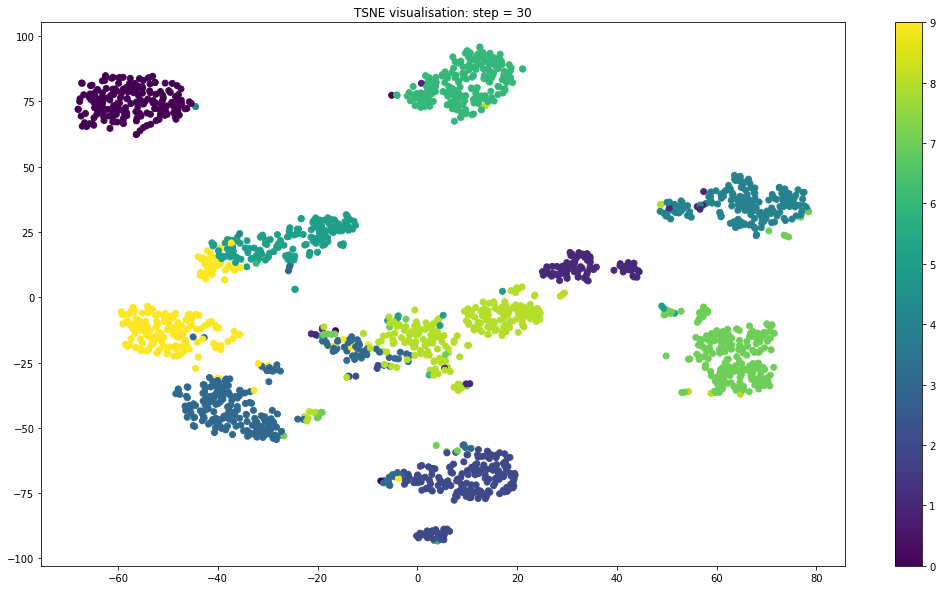

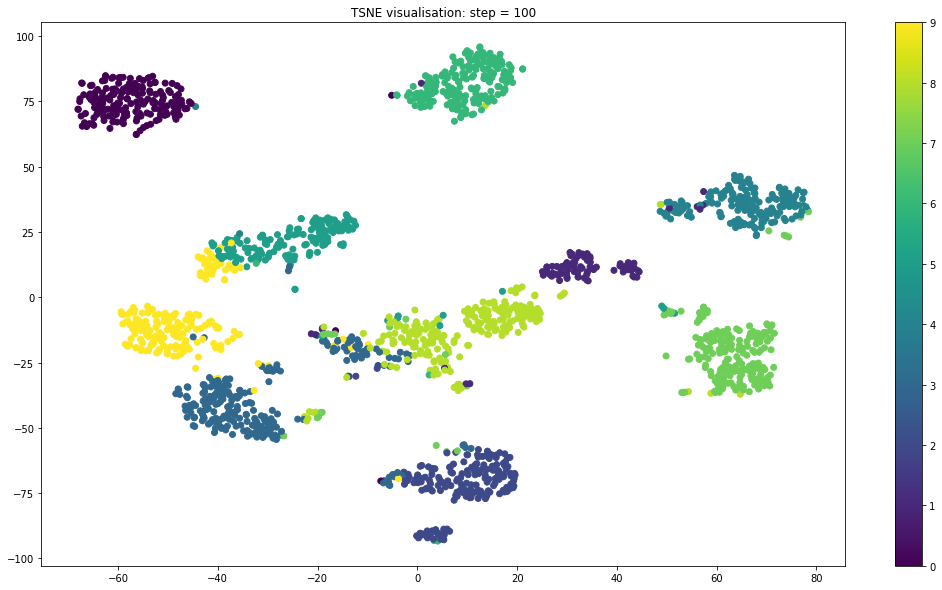

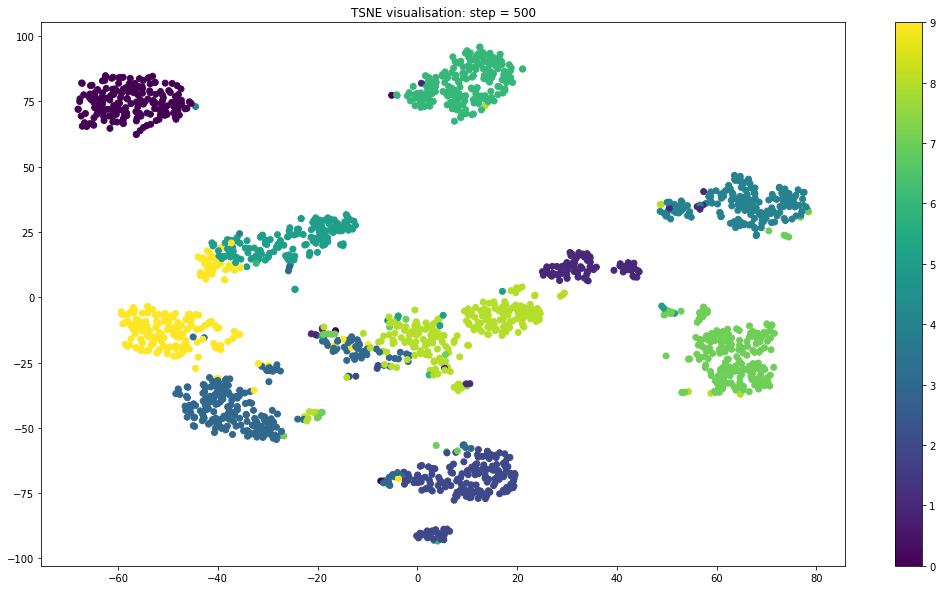

In [27]:
from sklearn.cluster import KMeans
steps = [1, 2, 5, 8, 12, 15, 30, 100, 500]
centers = X[10:20]

for step in steps:
    km = KMeans(n_clusters = 10, n_init = 1, init = centers, max_iter = step).fit(X)
    plt.figure(figsize = (18, 10))
    plt.scatter(xTSNE.transpose()[0], xTSNE.transpose()[1], c = km.predict(X))
    plt.colorbar()
    plt.title('TSNE visualisation: step = ' + str(step))
    centers = km.cluster_centers_